In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_inactivity = pd.read_csv('inactivity.csv', usecols=['FIPS', '% INACTIVE']) #FIPDS
data_obesity = pd.read_csv('obesity.csv', usecols=['FIPS', '% OBESE'])
data_diabetes = pd.read_csv('diabetes.csv', usecols=['FIPS', '% DIABETIC',])

inac_ob = pd.merge(data_inactivity, data_obesity, on='FIPS', how='inner')

dataset = pd.merge(inac_ob, data_diabetes, on='FIPS', how='inner')



In [3]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [17]:
y = y.reshape(len(y),1)
y.ravel()

array([9.4, 6.8, 7.3, 9.2, 6.6, 7.9, 7.3, 7.1, 5.9, 7.4, 6.8, 5.1, 6. ,
       6.9, 6.6, 5.7, 6.9, 5.5, 6.1, 6. , 6.8, 8.7, 6.3, 6.9, 5.5, 5.2,
       6.5, 5.6, 6. , 6.9, 7.4, 6.7, 5.4, 6.8, 6.7, 6.8, 6.7, 5.9, 6.3,
       5.9, 7. , 6.5, 6.8, 5.6, 7.2, 7.8, 9.7, 8.4, 7.9, 7.2, 7.3, 7.1,
       7.4, 7. , 8.6, 7.8, 7.9, 8.5, 8.2, 8.2, 7.7, 7. , 6.7, 8.5, 7.9,
       8.1, 7.6, 8.4, 8. , 8.4, 9.3, 7.9, 7.2, 8.6, 8.9, 7.8, 7.9, 7.4,
       7.1, 8.4, 5.1, 6.7, 6.6, 7.5, 7.1, 6.9, 6.7, 7.9, 7.9, 7.2, 7.6,
       6.6, 6.7, 6.5, 6.8, 6.8, 6.8, 6.8, 7.8, 6.8, 7. , 7.1, 7.9, 7.1,
       7.3, 7.2, 7.4, 7.2, 8.1, 6.9, 7.3, 6.9, 6.9, 7.3, 7.2, 7.2, 6.9,
       7. , 6.7, 8.6, 8.8, 7.7, 6.5, 7.5, 7.6, 6.8, 7.6, 8. , 8.4, 6.7,
       6.5, 7.1, 8.3, 6.7, 8.1, 6.6, 7.1, 5. , 6.1, 6.9, 6.9, 7.3, 7.8,
       7.4, 6.6, 6.9, 6.9, 5.8, 6.1, 6.6, 7.5, 7. , 7.7, 7.4, 8.1, 8.3,
       6.7, 7.5, 8.3, 7. , 6.6, 8. , 5.4, 7.2, 6.8, 6.9, 6.9, 7.3, 8.5,
       7. , 7. , 7.5, 7. , 6.8, 7. , 7.3, 6.9, 8.6, 8.6, 6.6, 8.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [20]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [21]:

y_pred_train = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_train)).reshape(-1,1))
y_pred_test = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
# np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Text(0.5, 1.0, 'Actual vs Predicted Diabetes Percentage (Training Data)')

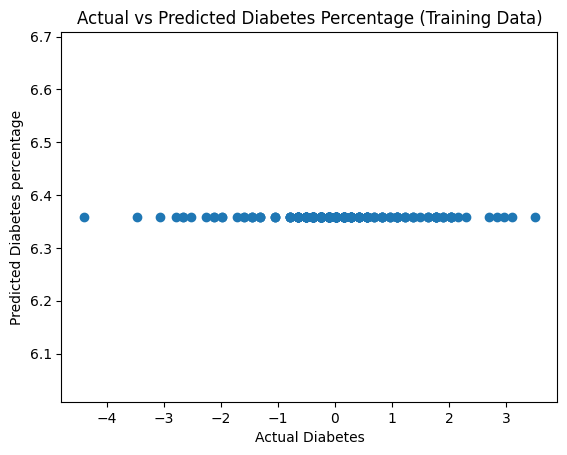

In [22]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Diabetes")
plt.ylabel("Predicted Diabetes percentage")
plt.title("Actual vs Predicted Diabetes Percentage (Training Data)")

In [15]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

-40.43295579657284

Text(0.5, 1.0, 'Actual vs Predicted Diabetes Percentage (Testing Data)')

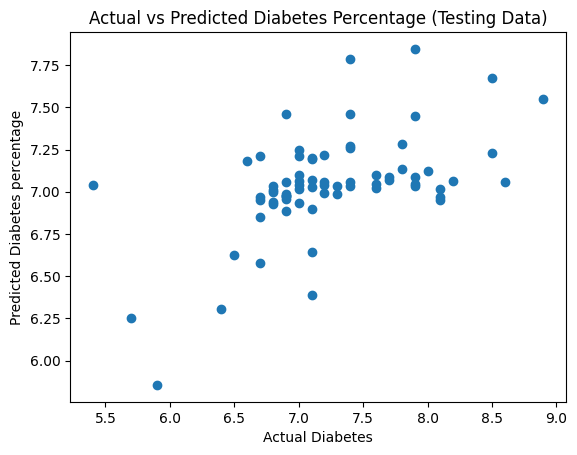

In [16]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Diabetes")
plt.ylabel("Predicted Diabetes percentage")
plt.title("Actual vs Predicted Diabetes Percentage (Testing Data)")

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.19010226003919073

In [46]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cross_val_r2 = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')


In [47]:
cross_val_r2

array([0.45857866, 0.1461435 , 0.37846895, 0.26363192, 0.30596135])

In [48]:
cv_range = np.max(cross_val_r2) - np.min(cross_val_r2)
print("Range of R-squared: ", cv_range)
cv_std = np.std(cross_val_r2)
print("Standard Deviation of R-squared: ", cv_std)
q75, q25 = np.percentile(cross_val_r2, [75 ,25])
cv_iqr = q75 - q25
print("Interquartile Range of R-squared: ", cv_iqr)


Range of R-squared:  0.3124351629532487
Standard Deviation of R-squared:  0.10561943827466556
Interquartile Range of R-squared:  0.11483703800520373


In [ ]:
# Next Steps:

# Consider further exploration of hyperparameter tuning or model configuration to potentially reduce this variability.
# Evaluate the model on additional metrics to gain a more comprehensive understanding of its performance.
# Investigate whether there are specific characteristics of the data or subsets where the model consistently performs well or poorly.
